## 03/18 인공지능 개론 실습

- Raisin(건포도) 종 구분하는 머신러닝

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_excel("./Raisin_Dataset.xlsx")
# excel파일을 read할 땐 read_excel함수 이용
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [5]:
df.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

Text(0.5, 1.0, 'Label')

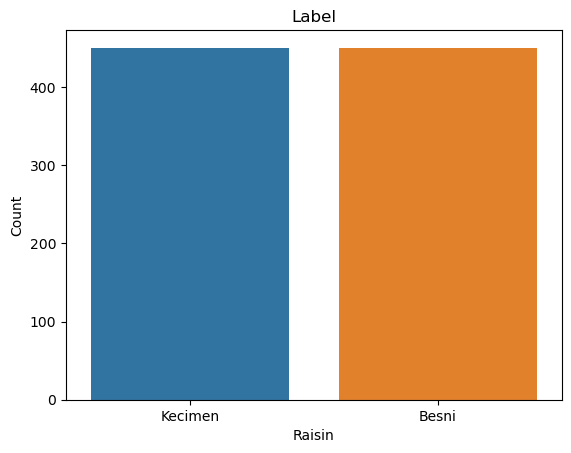

In [10]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Class")
plt.xlabel("Raisin")
plt.ylabel("Count")
plt.title("Label")

In [12]:
# 레이블 갯수 확인 (숫자)
df['Class'].value_counts()

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

In [14]:
# 결측치 확인
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [15]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [17]:
X=df.drop('Class', axis=1)
# class 컬럼 삭제하여 X에 저장, axis=1 이면 y축 기준
X.head()
# head()는 첫 5행만 출력함.

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251


In [18]:
y=df['Class']
y.value_counts()

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

### train_test_split으로 학습 데이터와 테스트 데이터로 나누기

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값
X_train

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
505,102569,515.395249,259.194228,0.864342,106888,0.573242,1331.797
210,49063,294.748287,217.913109,0.673355,50732,0.658811,869.795
655,69746,370.560481,241.914457,0.757501,72724,0.712603,1027.513
50,44939,317.616712,183.315215,0.816632,46400,0.656178,845.786
674,76114,435.387915,224.727631,0.856495,77824,0.681927,1100.929
...,...,...,...,...,...,...,...
835,87039,497.058056,236.212773,0.879866,96247,0.636981,1271.343
192,37569,232.427848,208.152006,0.444950,38874,0.794371,734.102
629,83059,440.559971,243.636512,0.833171,88806,0.685809,1238.163
559,139399,522.468010,348.282162,0.745407,144034,0.693631,1471.508


In [20]:
X_train.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter'],
      dtype='object')

In [21]:
y_train

505      Besni
210    Kecimen
655      Besni
50     Kecimen
674      Besni
        ...   
835      Besni
192    Kecimen
629      Besni
559      Besni
684      Besni
Name: Class, Length: 675, dtype: object

In [22]:
X_test.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
492,100443,457.569872,283.611280,0.784743,104186,0.673789,1269.066
141,53698,348.223231,197.752897,0.823104,56089,0.731341,938.705
409,104921,452.863013,297.024187,0.754864,108211,0.726298,1254.861
31,41809,307.532739,175.085568,0.822114,43838,0.697444,828.697
570,101223,496.533461,276.866203,0.830111,109593,0.713612,1345.426


In [23]:
y_test.head()

492      Besni
141    Kecimen
409    Kecimen
31     Kecimen
570      Besni
Name: Class, dtype: object

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# max_iter = 1000

In [29]:
from sklearn.svm import SVC

rsin_svm = SVC(random_state=0)
rsin_svm.fit(X_train, y_train)

pred_svm = rsin_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print('{:.5f}'.format(accuracy_score(y_test, pred_svm)))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.81333
[[ 83  32]
 [ 10 100]]


In [30]:
# Build a logistic regression classifier and predict

rsin_lr = LogisticRegression(random_state=0)
rsin_lr.fit(X_train, y_train)

pred_lr = rsin_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
#print (accuracy_score(y_test, pred_lr))
print('{:.5f}'.format(accuracy_score(y_test, pred_lr)))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.88444
[[ 99  16]
 [ 10 100]]


In [32]:
rsin_nn = MLPClassifier(random_state=0)
rsin_nn.fit(X_train, y_train)

pred_nn = rsin_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
#print (accuracy_score(y_test, pred_nn))
print('{:.5f}'.format(accuracy_score(y_test, pred_lr)))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.88444
[[ 11 104]
 [  4 106]]
